# Exact solution used in MES runs


We would like to MES the operation

$$
\left\{\left(\partial_\rho \phi\right)^2, n\right\}
$$

Using cylindrical geometry.

In [1]:
%matplotlib notebook

from sympy import init_printing
from sympy import S
from sympy import sin, cos, tanh, exp, pi, sqrt

from boutdata.mms import x, y, z, t
from boutdata.mms import DDX, DDZ

import os, sys
# If we add to sys.path, then it must be an absolute path
common_dir = os.path.abspath('./../../../')
# Sys path is a list of system paths
sys.path.append(common_dir)
from CELMAPy.MES import get_metric, make_plot, BOUT_print

init_printing()

In [2]:
def poisson(f, g, metric):
    return\
    DDZ(f, metric=metric)*DDX(g, metric=metric)\
    -\
    DDX(f, metric=metric)*DDZ(g, metric=metric)\

## Initialize

In [3]:
folder = '../twoGaussians/'
metric = get_metric()

## Define the variables

In [4]:
# Initialization
the_vars = {}

### Define the function to take the derivative of

**NOTE**:

1. z must be periodic
2. The field $f(\rho, \theta)$ must be of class infinity in $z=0$ and $z=2\pi$
3. The field $f(\rho, \theta)$ must be single valued when $\rho\to0$
4. The field $f(\rho, \theta)$ must be continuous in the $\rho$ direction with $f(\rho, \theta + \pi)$
5. Eventual BC in $\rho$ must be satisfied

In [5]:
# We need Lx
from boututils.options import BOUTOptions
myOpts = BOUTOptions(folder)
Lx = eval(myOpts.geom['Lx'])

In [6]:
# Two gaussians

# The skew sinus
# In cartesian coordinates we would like a sinus with with a wave-vector in the direction
# 45 degrees with respect to the first quadrant. This can be achieved with a wave vector
# k = [1/sqrt(2), 1/sqrt(2)]
# sin((1/sqrt(2))*(x + y))
# We would like 2 nodes, so we may write
# sin((1/sqrt(2))*(x + y)*(2*pi/(2*Lx)))
# Rewriting this to cylindrical coordinates, gives
# sin((1/sqrt(2))*(x*(cos(z)+sin(z)))*(2*pi/(2*Lx)))

# The gaussian
# In cartesian coordinates we would like
# f = exp(-(1/(2*w^2))*((x-x0)^2 + (y-y0)^2))
# In cylindrical coordinates, this translates to
# f = exp(-(1/(2*w^2))*(x^2 + y^2 + x0^2 + y0^2 - 2*(x*x0+y*y0) ))
#   = exp(-(1/(2*w^2))*(rho^2 + rho0^2 - 2*rho*rho0*(cos(theta)*cos(theta0)+sin(theta)*sin(theta0)) ))
#   = exp(-(1/(2*w^2))*(rho^2 + rho0^2 - 2*rho*rho0*(cos(theta - theta0)) ))

# A parabola
# In cartesian coordinates, we have
# ((x-x0)/Lx)^2
# Chosing this function to have a zero value at the edge yields in cylindrical coordinates
# ((x*cos(z)+Lx)/(2*Lx))^2

# Scaling with 40 to get S in order of unity

w = 0.8*Lx
rho0 = 0.3*Lx
theta0 = 5*pi/4
the_vars['n'] = 40*sin((1/sqrt(2))*(x*(cos(z)+sin(z)))*(2*pi/(2*Lx)))*\
                  exp(-(1/(2*w**2))*(x**2 + rho0**2 - 2*x*rho0*(cos(z - theta0)) ))*\
                  ((x*cos(z)+Lx)/(2*Lx))**2

# The gaussian

# In cartesian coordinates we would like
# f = exp(-(1/(2*w^2))*((x-x0)^2 + (y-y0)^2))
# In cylindrical coordinates, this translates to
# f = exp(-(1/(2*w^2))*(x^2 + y^2 + x0^2 + y0^2 - 2*(x*x0+y*y0) ))
#   = exp(-(1/(2*w^2))*(rho^2 + rho0^2 - 2*rho*rho0*(cos(theta)*cos(theta0)+sin(theta)*sin(theta0)) ))
#   = exp(-(1/(2*w^2))*(rho^2 + rho0^2 - 2*rho*rho0*(cos(theta - theta0)) ))

# Scaling with 40 to get S in order of unity

w = 0.5*Lx
rho0 = 0.2*Lx
theta0 = pi
the_vars['phi'] = 40*exp(-(1/(2*w**2))*(x**2 + rho0**2 - 2*x*rho0*(cos(z - theta0)) ))

Calculating the solution

In [7]:
the_vars['S'] = poisson(
                        DDX(the_vars['phi'], metric=metric)**2.0,
                        the_vars['n'],
                        metric=metric
                       )

## Plot

<IPython.core.display.Javascript object>


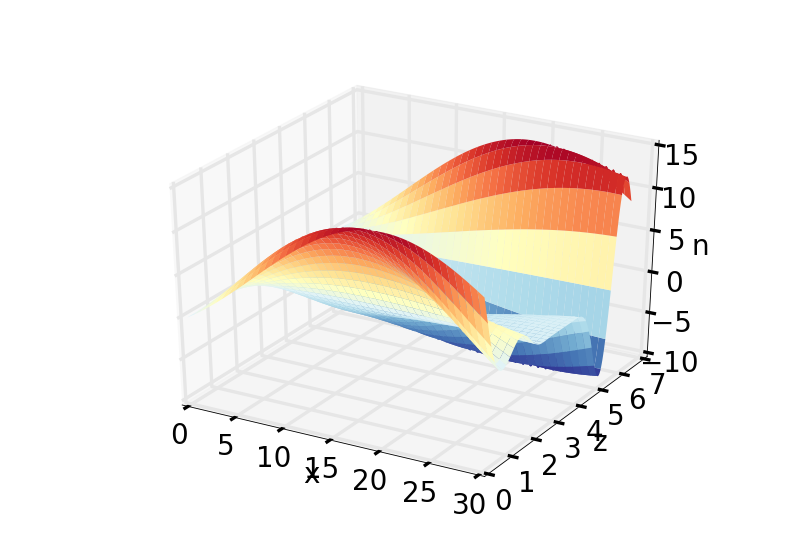

<IPython.core.display.Javascript object>


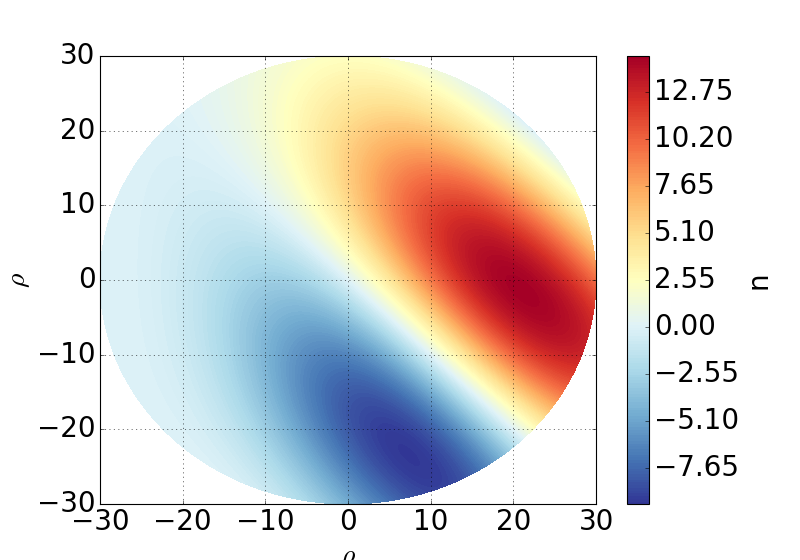

<IPython.core.display.Javascript object>


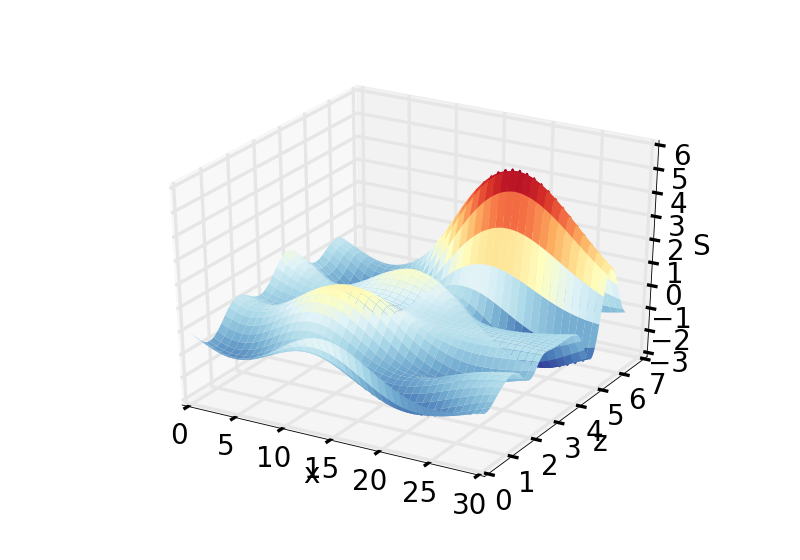

<IPython.core.display.Javascript object>


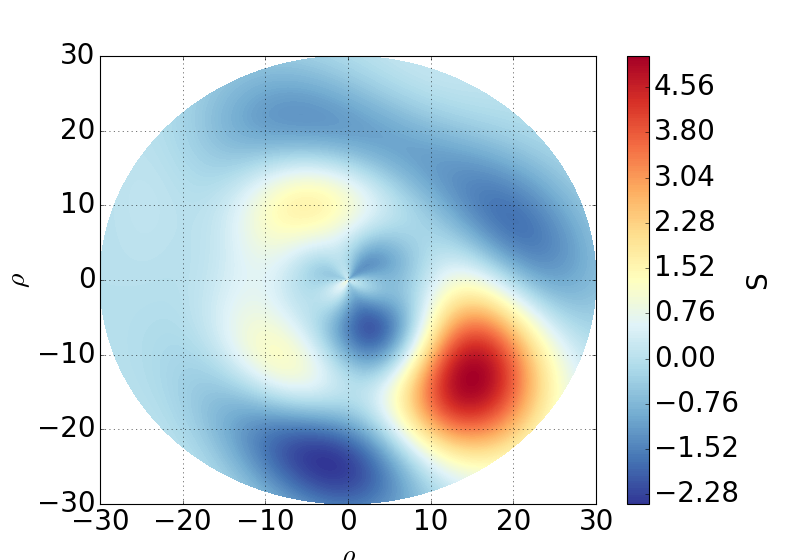

<IPython.core.display.Javascript object>


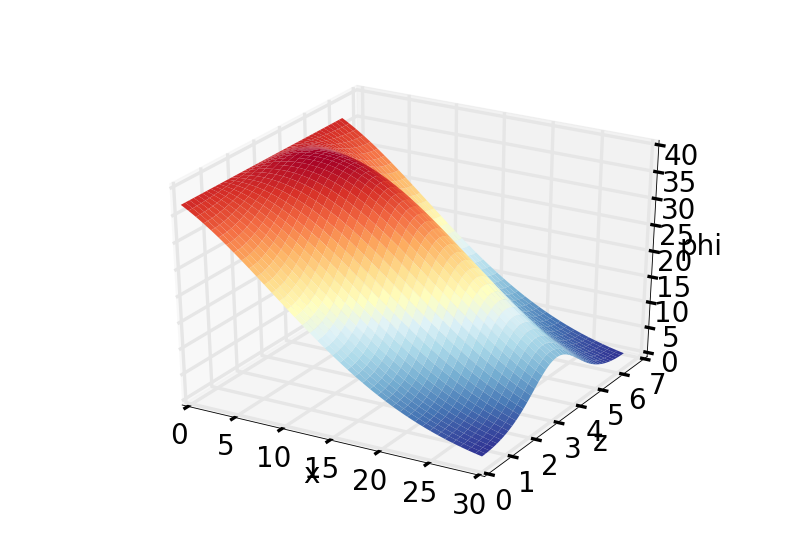

<IPython.core.display.Javascript object>


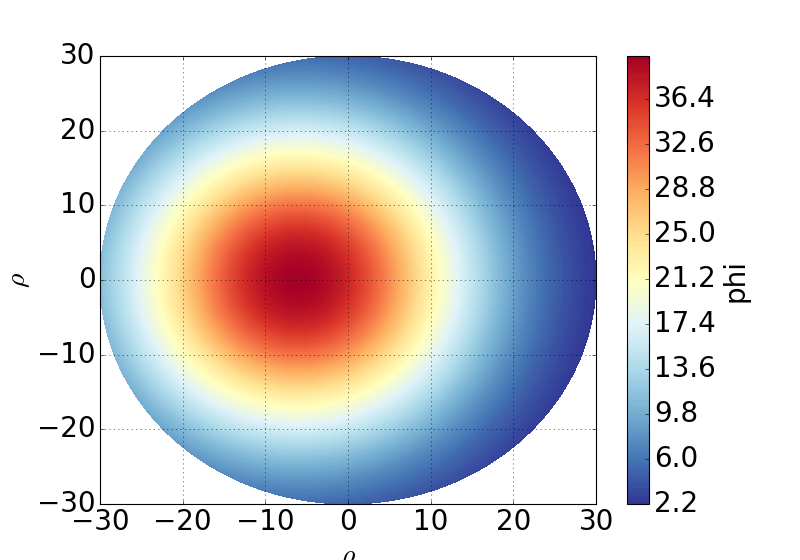

In [8]:
make_plot(folder=folder, the_vars=the_vars, plot2d=True, include_aux=False, save=False)

## Print the variables in BOUT++ format

In [9]:
BOUT_print(the_vars, rational=False)


[n]
37.2840996943811*(geom:xl*cos(z)/60 + 1/2)^2*exp(-0.000868055555555556*geom:xl^2 - 0.015625*geom:xl*sin(z + pi/4))*sin(sqrt(2)*pi*geom:xl*(sin(z) + cos(z))/60)

[S]
-1363.43006234594*((-0.00444444444444444*geom:xl - 0.0266666666666667*cos(z))*exp(-0.00222222222222222*geom:xl^2 - 0.0266666666666667*geom:xl*cos(z)))^2.0*(2.0*(-0.00444444444444444*geom:xl - 0.0266666666666667*cos(z))^2*exp(-0.00222222222222222*geom:xl^2 - 0.0266666666666667*geom:xl*cos(z)) - 0.00888888888888889*exp(-0.00222222222222222*geom:xl^2 - 0.0266666666666667*geom:xl*cos(z)))*(0.621401661573018*sqrt(2)*pi*geom:xl*(geom:xl*cos(z)/60 + 1/2)^2*(-sin(z) + cos(z))*exp(-0.000868055555555556*geom:xl^2 - 0.015625*geom:xl*sin(z + pi/4))*cos(sqrt(2)*pi*geom:xl*(sin(z) + cos(z))/60) - 0.582564057724705*geom:xl*(geom:xl*cos(z)/60 + 1/2)^2*exp(-0.000868055555555556*geom:xl^2 - 0.015625*geom:xl*sin(z + pi/4))*sin(sqrt(2)*pi*geom:xl*(sin(z) + cos(z))/60)*cos(z + pi/4) - 1.24280332314604*geom:xl*(geom:xl*cos(z)/60 + 1/2)*exp(